<a href="https://colab.research.google.com/github/Yujinsuu/nvidia_gan/blob/main/0227_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
# 259960 크래프톤
import yfinance as yf
pfe = yf.Ticker('259960.KS')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [22]:
hist = pfe.history(period='3y')
print(len(hist))
hist.tail()

625


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-21 00:00:00+09:00,234500.0,235500.0,224000.0,226000.0,111295,0.0,0.0
2024-02-22 00:00:00+09:00,228000.0,228000.0,222000.0,225000.0,86029,0.0,0.0
2024-02-23 00:00:00+09:00,226000.0,229000.0,222500.0,224500.0,88710,0.0,0.0
2024-02-26 00:00:00+09:00,226000.0,226000.0,217500.0,217500.0,90380,0.0,0.0
2024-02-27 00:00:00+09:00,219500.0,225500.0,217000.0,224000.0,98333,0.0,0.0


In [23]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,625.00000,625.000000,625.000000,625.000000,6.250000e+02,625.0,625.0
mean,255844.80000,260785.280000,250920.960000,255541.760000,2.191741e+05,0.0,0.0
std,107860.46947,110536.393854,104905.740776,107802.696823,3.061831e+05,0.0,0.0
min,146900.00000,149500.000000,145900.000000,146500.000000,0.000000e+00,0.0,0.0
25%,181000.00000,183800.000000,178500.000000,181000.000000,9.403300e+04,0.0,0.0
50%,215000.00000,218000.000000,210000.000000,213000.000000,1.448360e+05,0.0,0.0
75%,272500.00000,278500.000000,267000.000000,273500.000000,2.369700e+05,0.0,0.0
max,570000.00000,580000.000000,548000.000000,567000.000000,5.121520e+06,0.0,0.0


In [24]:
hist.mean()

Open            255844.8000
High            260785.2800
Low             250920.9600
Close           255541.7600
Volume          219174.1392
Dividends            0.0000
Stock Splits         0.0000
dtype: float64

In [25]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-10 00:00:00+09:00,448500.0,480000.0,400500.0,454000.0,5121520,0.0,0.0
2021-08-11 00:00:00+09:00,444500.0,446000.0,405000.0,407000.0,1647759,0.0,0.0
2021-08-12 00:00:00+09:00,414000.0,420500.0,402000.0,406000.0,947958,0.0,0.0
2021-08-13 00:00:00+09:00,415000.0,445500.0,408500.0,437000.0,1669847,0.0,0.0
2021-08-17 00:00:00+09:00,433000.0,460000.0,423000.0,451500.0,1189500,0.0,0.0


In [26]:
from tensorflow import keras
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [27]:
mid_prices = (hist['High'].values + hist['Low'].values) / 2
mid_prices

array([440250., 425500., 411250., 427000., 441500., 458500., 484000.,
       488750., 489750., 472000., 454250., 460500., 480750., 492250.,
       482500., 497000., 505750., 499500., 490750., 470000., 475500.,
       483750., 454750., 448000., 464000., 484750., 491250., 495000.,
       492000., 496250., 495500., 498500., 489750., 506750., 499000.,
       478750., 460500., 466750., 471500., 475500., 492000., 486250.,
       475500., 480500., 492000., 493000., 492500., 490000., 497750.,
       493000., 495750., 483250., 473500., 478500., 487000., 478250.,
       471500., 459500., 436750., 452500., 478750., 510000., 535000.,
       545000., 550500., 564000., 557500., 537500., 524000., 508250.,
       503500., 509500., 508000., 511250., 501500., 495000., 491500.,
       498250., 485750., 466750., 467500., 474000., 481000., 488750.,
       491500., 489500., 485500., 486750., 480000., 472250., 471250.,
       466500., 465000., 456000., 455750., 467500., 462750., 450750.,
       427750., 4065

In [28]:
scale = preprocessing.MinMaxScaler(feature_range=(0,1))
# 값의 범위를 0, 1 사이로
mid_prices = mid_prices.reshape(-1,1)
mid_prices = scale.fit_transform(mid_prices)
mid_prices

array([[7.02595530e-01],
       [6.67147320e-01],
       [6.32900745e-01],
       [6.70752223e-01],
       [7.05599615e-01],
       [7.46455179e-01],
       [8.07738524e-01],
       [8.19154050e-01],
       [8.21557318e-01],
       [7.78899303e-01],
       [7.36241288e-01],
       [7.51261716e-01],
       [7.99927902e-01],
       [8.27565489e-01],
       [8.04133622e-01],
       [8.38981014e-01],
       [8.60009613e-01],
       [8.44989185e-01],
       [8.23960586e-01],
       [7.74092766e-01],
       [7.87310743e-01],
       [8.07137707e-01],
       [7.37442922e-01],
       [7.21220860e-01],
       [7.59673155e-01],
       [8.09540976e-01],
       [8.25162221e-01],
       [8.34174477e-01],
       [8.26964672e-01],
       [8.37178563e-01],
       [8.35376112e-01],
       [8.42585917e-01],
       [8.21557318e-01],
       [8.62412882e-01],
       [8.43787551e-01],
       [7.95121365e-01],
       [7.51261716e-01],
       [7.66282144e-01],
       [7.77697669e-01],
       [7.87310743e-01],


In [29]:
train_len = 3
train_data = []
label_data = []
for index in range(len(mid_prices) - train_len):
  train_data.append(mid_prices[index:index+train_len])
  label_data.append(mid_prices[train_len + index])
print(train_data[:2])
print(label_data[:2])

[array([[0.70259553],
       [0.66714732],
       [0.63290075]]), array([[0.66714732],
       [0.63290075],
       [0.67075222]])]
[array([0.67075222]), array([0.70559962])]


In [30]:
import numpy as np
np_train_data = np.array(train_data)
np_label_data = np.array(label_data)

np_train_data.shape , np_label_data.shape

((622, 3, 1), (622, 1))

In [31]:
x_test = np_train_data[-50:]
y_test = np_label_data[-50:]
x_train = np_train_data[:-50]
y_train = np_label_data[:-50]

x_test.shape, y_test.shape, x_train.shape, y_train.shape

((50, 3, 1), (50, 1), (572, 3, 1), (572, 1))

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=x_train.shape[1:], activation='relu'))
model.add(LSTM(50, return_sequences=False, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


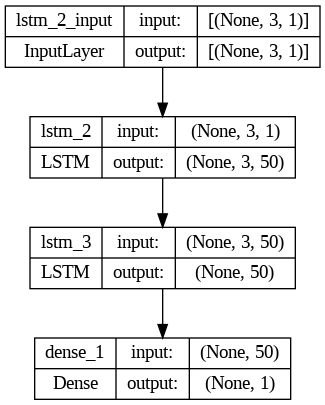

In [33]:
keras.utils.plot_model(model, to_file='model.png',
                          show_shapes=True,show_layer_names=True)

In [36]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
mc = ModelCheckpoint('/content/model_check',monitor='val_loss',save_best_only=True)
es = EarlyStopping(patience=20, monitor='val_loss')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,callbacks=[mc,es])

Epoch 1/200
18/18 [==============================] - 6s 189ms/step - loss: 0.0010 - mae: 0.0223 - val_loss: 8.8661e-04 - val_mae: 0.0253
Epoch 2/200
18/18 [==============================] - 3s 151ms/step - loss: 9.7894e-04 - mae: 0.0211 - val_loss: 4.7214e-04 - val_mae: 0.0168
Epoch 3/200
18/18 [==============================] - 0s 24ms/step - loss: 8.1677e-04 - mae: 0.0192 - val_loss: 4.9443e-04 - val_mae: 0.0174
Epoch 4/200
18/18 [==============================] - 3s 168ms/step - loss: 8.2549e-04 - mae: 0.0192 - val_loss: 4.3453e-04 - val_mae: 0.0162
Epoch 5/200
18/18 [==============================] - 3s 171ms/step - loss: 8.4268e-04 - mae: 0.0192 - val_loss: 4.2322e-04 - val_mae: 0.0160
Epoch 6/200
18/18 [==============================] - 0s 14ms/step - loss: 8.5421e-04 - mae: 0.0195 - val_loss: 5.5731e-04 - val_mae: 0.0187
Epoch 7/200
18/18 [==============================] - 0s 13ms/step - loss: 8.4952e-04 - mae: 0.0198 - val_loss: 5.1141e-04 - val_mae: 0.0182
Epoch 8/200
18/18 [=

2/2 [==============================] - 0s 6ms/step


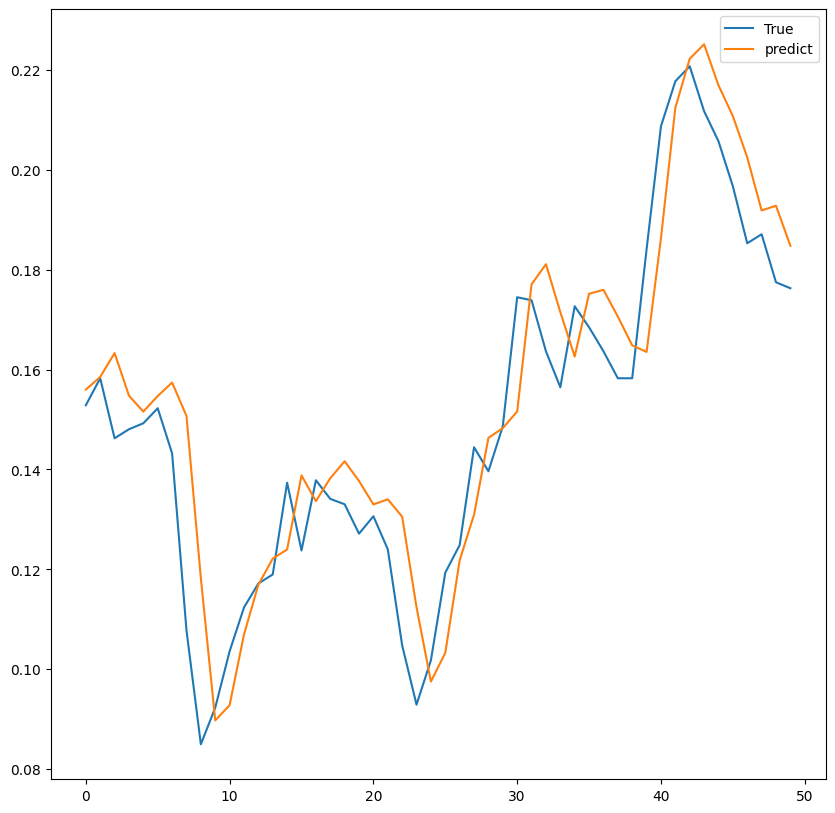

In [37]:
import matplotlib.pyplot as plt

pred = model.predict(x_test)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='predict')
ax.legend()
fig.show()
